# MNIST Data Preprocessing
1. **Loads MNIST dataset:**
    - `(x_train, y_train), (x_test, y_test) = mnist.load_data()`
2. **Prepares training data:**
    - Reshapes first 60000 images: `images = x_train[0:60000].reshape(60000, 28*28) / 255`
    - One-hot encodes labels: `labels = np.zeros((len(labels), 10)); ...`
3. **Prepares test data:**
    - Reshapes and normalizes all test images: `test_images_all = x_test.reshape(len(x_test), 28*28) / 255`
    - One-hot encodes test labels: `test_labels_all = np.zeros((len(y_test), 10)); ...`
    - Selects first 6000 test images and labels: `test_images, test_labels = test_images_all[0:6000], test_labels_all[0:6000]`



In [527]:
import sys, numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
# Preparing the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
images, labels = (x_train[0:60000].reshape(60000,28*28) / 255, y_train[0:60000])
one_hot_labels = np.zeros((len(labels), 10))
for i, l in enumerate(labels):
    one_hot_labels[i][l] = 1
labels = one_hot_labels

test_images_all = x_test.reshape(len(x_test), 28*28) / 255
test_labels_all = np.zeros((len(y_test), 10))
for i, l in enumerate(y_test):
    test_labels_all[i][l] = 1
test_images = test_images_all[0:6000]
test_labels = test_labels_all[0:6000]

In [545]:
print(f'The shape of Training images: {images.shape}')
print(f'The shape of Training labels: {labels.shape}')
print(f'The shape of test images: {test_images.shape}')
print(f'The shape of test labels: {test_labels.shape}')

The shape of Training images: (60000, 784)
The shape of Training labels: (60000, 10)
The shape of test images: (6000, 784)
The shape of test labels: (6000, 10)


# Model Initialization

- **Layer Definitions:**
    - `HIDDEN_LAYER_SIZE = 100`: Number of neurons in the hidden layer.
    - `OUTPUT_LAYER_SIZE = 10`: Number of neurons in the output layer (matching 10 digits in MNIST).
    - `INPUT_LAYER_SIZE = images.shape[1]`: Number of input features (784 pixels for MNIST images).
- **Model Weights and Biases:**
    - `W1`: Weights connecting input layer to hidden layer (784x100 matrix).
    - `b1`: Biases for hidden layer neurons (1x100 vector).
    - `W2`: Weights connecting hidden layer to output layer (100x10 matrix).
    - `b2`: Biases for output layer neurons (1x10 vector).
- **Random Initialization:**
    - Weights are initialized with small random values between -1 and 1 for better learning.
    - Biases are initialized to zero.

**Purpose:**

- Creates a basic neural network model with one hidden layer, ready for training on the prepared MNIST data.
```**


In [529]:
HIDDEN_LAYER_SIZE = 100
OUTPUT_LAYER_SIZE = 10
INPUT_LAYER_SIZE = images.shape[1]
model = {
    'W1': 2 * np.random.random((INPUT_LAYER_SIZE, HIDDEN_LAYER_SIZE)) - 1, # 784 x HIDDEN_LAYER_SIZE
    'b1': np.zeros((1, HIDDEN_LAYER_SIZE)), # 1 x HIDDEN_LAYER_SIZE
    'W2': 2 * np.random.random((HIDDEN_LAYER_SIZE, OUTPUT_LAYER_SIZE)) - 1, # HIDDEN_LAYER_SIZE x OUTPUT_LAYER_SIZE
    'b2': np.zeros((1, OUTPUT_LAYER_SIZE)) # 1 x OUTPUT_LAYER_SIZE
}

# Activation Functions

**Defined Functions:**

- **`sigmoid(x)`:**
    - S-shaped curve that maps input values between 0 and 1.
    - Commonly used in output layers for binary classification.
    - `np.clip(x, -50, 50)` prevents numerical overflow.
- **`sigmoid_derivative(x)`:**
    - Calculates the derivative of the sigmoid function, used for backpropagation.
- **`relu(x)`:**
    - Rectified Linear Unit, outputs 0 for negative inputs and the input value itself for positive inputs.
    - Promotes sparsity and helps prevent vanishing gradients.
- **`relu2deriv(output)`:**
    - Derivative of ReLU, used for backpropagation.

**Purpose:**

- These functions introduce non-linearity into neural networks, enabling them to learn complex patterns and decision boundaries.
- They are essential for the training process, as they determine how neurons transform their inputs into outputs and how errors are propagated back to adjust weights and biases.
```**


In [530]:
def sigmoid(x):
    x = np.clip(x, -50, 50)
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return (x > 0) * x
def relu2deriv(output):
    return output > 0

 **L1 Regularization (Lasso):**

**Theory:**

* L1 regularization, also known as Lasso regularization, adds a penalty term to the cost function that is proportional to the absolute values of the weights.
* The goal is to prevent some weights from becoming too large and drive them towards zero.
* The regularization term is the sum of the absolute values of the weights multiplied by a regularization parameter (λ):

        
        L1_term = λ * ∑ᵢⱼ |Wᵢⱼ|
        

* Where:
    * λ is the regularization parameter.
    * Wᵢⱼ represents an individual weight in the weight matrix.

**Implementation in train_mnist:**

* For each weight matrix W, update it using the following term for L1 regularization:

        
        W -= learning_rate * (gradient + (λ * sign(W)))
        

* Here, `sign(W)` represents the element-wise sign function, What it does:

It takes a matrix W as input and returns a matrix of the same shape, where each element has been replaced with its sign (positive, negative, or zero).
It does this by applying the sign function to each element individually.

        Sign function definition:

        For positive numbers: sign(x) = 1
        For negative numbers: sign(x) = -1
        For zero: sign(x) = 0

**This term helps to shrink some of the weights towards zero during each update, effectively applying L1 regularization**.



**L2 Regularization (Ridge):**

**Theory:**

* L2 regularization, also known as Ridge regularization, adds a penalty term to the cost function that is proportional to the square of the weights.
* The goal is to prevent some weights from becoming too large.
* The regularization term is the sum of the squared values of the weights multiplied by a regularization parameter (λ):

        
        L2_term = λ * ∑ᵢⱼ (Wᵢⱼ)²
        

* Where:
    * λ is the regularization parameter.
    * Wᵢⱼ represents an individual weight in the weight matrix.

**Implementation in train_mnist:**

* For each weight matrix W, update it using the following term for L2 regularization:

        
        W -= learning_rate * (gradient + (λ * W))
        

* Here, `λ * W` adds a regularization term that is proportional to the weights themselves.
* This term penalizes large weights and helps prevent overfitting.


**Summary:**

* Both L1 and L2 regularization aim to prevent overfitting by adding penalty terms to the cost function that discourage large weights.
* L1 tends to produce sparse weight matrices, encouraging some weights to become exactly zero.
* L2 generally results in smaller but non-zero weights.
* The choice between L1 and L2 regularization depends on the specific characteristics of the problem at hand.

 **Explaination of the `train_mnist` function:**

**1. Function Purpose:**
- Trains a neural network model on the MNIST dataset using mini-batch gradient descent.

**2. Parameters:**
- `images`: Input images (array of shape `(num_samples, 784)`).
- `labels`: True labels (array of shape `(num_samples, OUTPUT_LAYER_SIZE)`).
- `model`: Dictionary containing model weights and biases.
- `lr`: Learning rate (default: 0.01).
- `regularization`: Type of regularization to apply (None, 'L1', or 'L2', default: None).
- `reg_lambda`: Regularization strength (default: 0.001).
- `decay_rate`: Learning rate decay rate (default: 0.95).
- `mini_batch_size`: Size of mini-batches (default: 128).

**3. Steps:**

1. **Mini-Batch Loop:**
   - Iterates through the dataset in mini-batches.
2. **Extract Mini-Batch:**
   - Gets a subset of images and labels for the current mini-batch.
3. **Forward Pass:**
   - Calculates outputs for the mini-batch using the model.
   - Applies ReLU in the hidden layer and sigmoid in the output layer.
4. **Calculate Error:**
   - Computes the difference between predicted outputs and true labels.
5. **Backpropagation:**
   - Calculates error gradients for the output and hidden layers.
   - Uses derivatives of ReLU and sigmoid functions.
6. **Weights Update:**
   - Adjusts model weights and biases based on the gradients and learning rate.
   - Incorporates regularization (L1 or L2) if specified.
7. **Learning Rate Decay:**
   - Decreases the learning rate after each mini-batch to aid convergence.
8. **Return Updated Model:**
   - Returns the model with updated weights and biases.


In [531]:
def train_mnist(images, labels, model, lr=0.01, regularization=None, reg_lambda=0.001, decay_rate=0.95, mini_batch_size=128):
    num_samples = len(images)
    
    for i in range(0, num_samples, mini_batch_size):
        # Extract mini-batch
        batch_images = images[i:i+mini_batch_size] 
        batch_labels = labels[i:i+mini_batch_size] 
        
        # Forward pass
        hidden_layer = relu(batch_images.dot(model['W1']) + model['b1']) # BATCHSIZE x 784 * 784 x HIDDEN_LAYER_SIZE = BATCHSIZE x HIDDEN_LAYER_SIZE
        output_layer = sigmoid(hidden_layer.dot(model['W2']) + model['b2']) # BATCHSIZE x HIDDEN_LAYER_SIZE * HIDDEN_LAYER_SIZE x OUTPUT_LAYER_SIZE = BATCHSIZE x OUTPUT_LAYER_SIZE

        # Calculate the error/loss
        error = output_layer - batch_labels # BATCHSIZE x OUTPUT_LAYER_SIZE # calculates the pure error, or loss, which is used for computing derivatives in backpropagation

        # Backpropagation
        output_layer_delta = error * sigmoid_derivative(output_layer) # BATCHSIZE x OUTPUT_LAYER_SIZE
        hidden_layer_delta = output_layer_delta.dot(model['W2'].T) * relu2deriv(hidden_layer) # BATCHSIZE x OUTPUT_LAYER_SIZE * OUTPUT_LAYER_SIZE x HIDDEN_LAYER_SIZE = BATCHSIZE x HIDDEN_LAYER_SIZE

        # Weights Update
        if regularization == 'L1':
            model['W2'] -= lr * (hidden_layer.T.dot(output_layer_delta)) + reg_lambda * np.sign(model['W2']) # HIDDEN_LAYER_SIZE x OUTPUT_LAYER_SIZE 
            model['W1'] -= lr * (batch_images.T.dot(hidden_layer_delta)) + reg_lambda * np.sign(model['W1']) # INPUT_LAYER_SIZE x HIDDEN_LAYER_SIZE 
        elif regularization == 'L2':
            model['W2'] -= lr * (hidden_layer.T.dot(output_layer_delta)) + reg_lambda * model['W2'] # HIDDEN_LAYER_SIZE x OUTPUT_LAYER_SIZE
            model['W1'] -= lr * (batch_images.T.dot(hidden_layer_delta)) + reg_lambda * model['W1'] # INPUT_LAYER_SIZE x HIDDEN_LAYER_SIZE
        else:
            model['W2'] -= lr * (hidden_layer.T.dot(output_layer_delta)) # HIDDEN_LAYER_SIZE x OUTPUT_LAYER_SIZE
            model['W1'] -= lr * (batch_images.T.dot(hidden_layer_delta)) # INPUT_LAYER_SIZE x HIDDEN_LAYER_SIZE

        model['b2'] -= lr * np.mean(output_layer_delta) # 1 x HIDDEN_LAYER_SIZE
        model['b1'] -= lr * np.mean(hidden_layer_delta) # 1 x OUTPUT_LAYER_SIZE

    # Learning rate decay
    lr *= decay_rate

    return model


 **Implementation of the prediction and evaluation function**

**1. `model_prediction(model, X)`:**

- **Purpose:** Generates predictions for given inputs using the model.
- **Steps:**
    1. **Calculate hidden layer outputs:** Applies ReLU activation to the weighted sum of inputs and hidden layer weights (`model['W1']`) plus biases (`model['b1']`).
    2. **Calculate output layer outputs:** Applies sigmoid activation to the weighted sum of hidden layer outputs and output layer weights (`model['W2']`) plus biases (`model['b2']`).
    3. **Return output layer:** Returns raw output scores from the output layer, representing predicted probabilities (or confidence scores) for each class.

**2. `evaluate_accuracy(model, X, y_true)`:**

- **Purpose:** Calculates overall accuracy of the model's predictions on a dataset.
- **Steps:**
    1. **Generate model predictions:** Calls `model_prediction` to get predictions for all inputs in `X`.
    2. **Extract predicted labels:** Finds the index of the highest-scoring class for each prediction using `np.argmax`.
    3. **Extract true labels:** Extracts true class labels from `y_true` (assuming one-hot encoded).
    4. **Compare predictions and true labels:** Calculates the proportion of correct predictions.
    5. **Return accuracy:** Returns the overall accuracy as a percentage.

**3. `evaluate_accuracy_one_sample(model, X, y_true)`:**

- **Purpose:** Evaluates accuracy for a single sample (input and true label).
- **Steps:**
    1. **Generate model prediction:** Calls `model_prediction` for the single input `X`.
    2. **Extract predicted label:** Finds the index of the highest-scoring class in the prediction.
    3. **Extract true label:** Extracts the true class label from `y_true`.
    4. **Compare prediction and true label:** Checks if they match.
    5. **Return accuracy:** Returns `True` if prediction is correct, `False` otherwise.


In [532]:
def model_prediction(model, X):
    hidden_layer = relu(X.dot(model['W1']) + model['b1']) 
    output_layer = sigmoid(hidden_layer.dot(model['W2']) + model['b2']) 
    return output_layer

def evaluate_accuracy(model, X, y_true):
    predictions = model_prediction(model, X)
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(y_true, axis=1)
    
    accuracy = np.mean(predicted_labels == true_labels)
    return accuracy
def evaluate_accuracy_one_sample(model, X, y_true):
    predictions = model_prediction(model, X)
    predicted_labels = np.argmax(predictions)
    true_labels = np.argmax(y_true)
    
    accuracy = predicted_labels == true_labels
    return accuracy


**1. Training Setup:**

- **Lists for Accuracies:** `train_accuracies` and `val_accuracies` store accuracies from each epoch for tracking progress.
- **Early Stopping:**
    - `no_improvement_count` tracks epochs without validation improvement.
    - `patience` sets the maximum number of epochs without improvement before stopping (50 in this case).
    - `best_val_acc` stores the best validation accuracy achieved so far.

**2. Training Loop:**

- **Iterates up to 500 epochs:** Runs a maximum of 500 training iterations.
- **Model Training:**
    - Calls the `train_mnist` function to train the model on the training data (`images`, `labels`).
        - Uses hyperparameters: learning rate (`lr`), regularization type (`regularization`), regularization strength (`reg_lambda`), and mini-batch size (`mini_batch_size`).
- **Accuracy Calculation:**
    - Evaluates accuracy on both training and validation sets using `evaluate_accuracy`.
- **Storing Accuracies:** Appends accuracies to their respective lists for plotting.
- **Printing Progress:** Prints epoch number and accuracies.
- **Best Model Tracking:**
    - If validation accuracy improves, updates `best_val_acc`, copies model weights to `best_model`, and resets `no_improvement_count`.
- **Early Stopping:**
    - If validation accuracy hasn't improved for `patience` epochs, stops training and prints a message.


In [533]:
train_accuracies = []
val_accuracies = []
no_improvement_count = 0
patience = 50
best_val_acc = 0.0
for iteration in range(500):
    # Training the model
    train_mnist(images, labels, model, lr=0.001, regularization='L2', reg_lambda=0.001, mini_batch_size=512)

    # Calculating the accuracies
    train_accuracy = evaluate_accuracy(model, images, labels)
    val_accuracy = evaluate_accuracy(model, test_images, test_labels)

    # Storing the accuracies to plot it
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    
    print(f"Epoch {iteration + 1}, Train Accuracy: {train_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}")
    # Picking up the best model weights and accuracy
    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        best_model = model.copy()
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    if no_improvement_count >= patience:
        print("Early stopping: Validation accuracy did not improve for 50 epochs.")
        break


Epoch 1, Train Accuracy: 0.8158, Val Accuracy: 0.7917
Epoch 2, Train Accuracy: 0.8573, Val Accuracy: 0.8327
Epoch 3, Train Accuracy: 0.8806, Val Accuracy: 0.8572
Epoch 4, Train Accuracy: 0.8960, Val Accuracy: 0.8753
Epoch 5, Train Accuracy: 0.9065, Val Accuracy: 0.8870
Epoch 6, Train Accuracy: 0.9138, Val Accuracy: 0.8963
Epoch 7, Train Accuracy: 0.9192, Val Accuracy: 0.9018
Epoch 8, Train Accuracy: 0.9241, Val Accuracy: 0.9087
Epoch 9, Train Accuracy: 0.9276, Val Accuracy: 0.9132
Epoch 10, Train Accuracy: 0.9297, Val Accuracy: 0.9172
Epoch 11, Train Accuracy: 0.9318, Val Accuracy: 0.9195
Epoch 12, Train Accuracy: 0.9336, Val Accuracy: 0.9208
Epoch 13, Train Accuracy: 0.9348, Val Accuracy: 0.9228
Epoch 14, Train Accuracy: 0.9358, Val Accuracy: 0.9240
Epoch 15, Train Accuracy: 0.9370, Val Accuracy: 0.9250
Epoch 16, Train Accuracy: 0.9381, Val Accuracy: 0.9262
Epoch 17, Train Accuracy: 0.9390, Val Accuracy: 0.9258
Epoch 18, Train Accuracy: 0.9397, Val Accuracy: 0.9267
Epoch 19, Train Acc

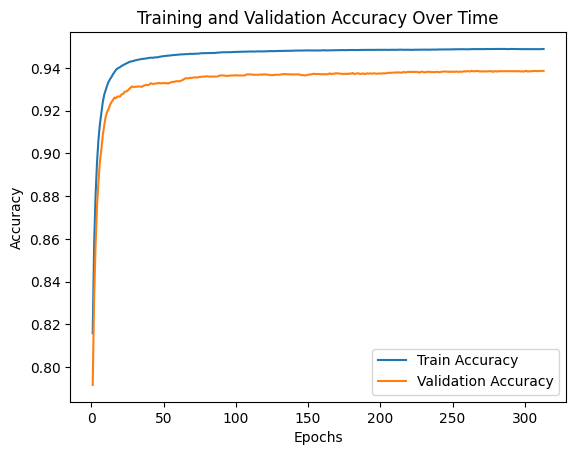

In [534]:
# Visualizing the accuracies
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Time')
plt.legend()
plt.show()

In [535]:
print(f'Best Model Accuracy on Validation set is: {np.round(best_val_acc * 100)}%')

Best Model Accuracy on Validation set is: 94.0%


**1. Testing on Remaining Test Set:**
- It loops through images not used for validation.
- For each image:
    - Gets a prediction from the best model.
    - Extracts predicted and true labels.
    - Stores them as pairs for later analysis.

**2. Calculating Accuracy:**
- Counts correct predictions using list comprehension.
- Divides correct by total to get accuracy.

**3. Printing Results:**
- Outputs number of correct predictions, total predictions, and accuracy percentage.



In [536]:
# Iterating over the rest of the test images that we didnt include in val_set
all_preds = []
for image in range(len(test_labels), len(test_labels_all)):
    test_image = test_images_all[image]
    test_label = test_labels_all[image]
    predicted_label = model_prediction(best_model, test_image)
    predicted_label = np.argmax(predicted_label)
    test_label = np.argmax(test_label)
    all_preds.append((predicted_label,test_label))

correct_predictions = sum(1 for pred, true_label in all_preds if pred == true_label)
accuracy = np.round(correct_predictions / len(all_preds) * 100, 2)

print(f'Correct predictions count is: {correct_predictions} out of {len(all_preds)}\nThe accuracy is: {accuracy}%')

Correct predictions count is: 3883 out of 4000
The accuracy is: 97.08%


In [537]:
# Predicting a random images
res = evaluate_accuracy_one_sample(best_model, test_images_all[6123], test_labels_all[6123])
res 


True

## Draft cells


In [574]:
# Simulating the error 
preds = model_prediction(model, test_images[0:16]) # 16x10
print(f'Actual Label of example 1:\n {test_labels[0:16][0]}')
print()
print(f'Prediction of the model of example 1:\n {preds[0]}')
print()
print(f'Subtraction of the predection and the actual label example 1:\n {(preds - test_labels[0:16])[0]}') # This is the pure error which is we are going to calculate the dervitive according to it
print('-------------------------')
print((test_labels[0:16]).shape)
print((preds.shape))

Actual Label of example 1:
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]

Prediction of the model of example 1:
 [3.66841683e-03 4.28247687e-04 1.00267565e-02 1.35233031e-02
 3.71979415e-04 6.53563982e-03 1.47981144e-04 9.91988261e-01
 2.93858506e-03 6.39082652e-03]

Subtraction of the predection and the actual label example 1:
 [ 0.00366842  0.00042825  0.01002676  0.0135233   0.00037198  0.00653564
  0.00014798 -0.00801174  0.00293859  0.00639083]
-------------------------
(16, 10)
(16, 10)


In [581]:
print(np.argmax(preds, axis=1))
print(np.argmax(test_labels[0:16], axis=1))
print(np.mean(np.argmax(preds, axis=1) == np.argmax(test_labels[0:16], axis=1)))
print(np.argmax(preds[0])) # taking a list and returning the index of the greatest number of this list

[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5]
0.9375
7


In [538]:
print(0.0015 * 0.15)

0.000225


In [539]:
test = np.zeros((HIDDEN_LAYER_SIZE, 1))
test2 = test.reshape(1, -1)
test2

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [540]:
print(np.sign(np.random.rand(5, 1)) * 0.01) # -1 if x < 0, 0 if x==0, 1 if x > 0

[[0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]]


In [541]:
h = np.array([[4.0, 7.0],
              [3.0, 1.0]])

delta = np.array([[7.0, 1.0],
                  [5.0, 2.0]])

w = np.array([[3.0, 5.0],
              [4.0, 6.0]])

## model['W2'] -= lr * (hidden_layer.T.dot(output_layer_delta)) + reg_lambda * model['W2']

left = h.dot(delta)

print(left) # hidden.dot(output_delta)

lambda_w = np.array([[0.03, 0.05],
                     [0.04, 0.06]]) # reg_lambda * w = 0.01 * w

print(left + lambda_w)
print(w)
w -= 0.001 * (left) + lambda_w
print(w)


[[63. 18.]
 [26.  5.]]
[[63.03 18.05]
 [26.04  5.06]]
[[3. 5.]
 [4. 6.]]
[[2.907 4.932]
 [3.934 5.935]]


In [542]:
#L2 Regularization
h = np.array([[4.0, 7.0],
             [3.0, 1.0]])

delta = np.array([[7.0, 1.0],
                 [5.0, 2.0]])

w = np.array([[3.0, 5.0],
             [4.0, 6.0]])

reg_lambda = 0.01  # Regularization parameter
learning_rate = 0.01

for _ in range(5):
   left = h.dot(delta)
   lambda_w = reg_lambda * w

   w -= learning_rate * (left + lambda_w)
   print(f"Iteration {_+1}:")
   print(f"w: {w}")


Iteration 1:
w: [[2.3697 4.8195]
 [3.7396 5.9494]]
Iteration 2:
w: [[1.73946303 4.63901805]
 [3.47922604 5.89880506]]
Iteration 3:
w: [[1.10928908 4.45855415]
 [3.21887812 5.84821518]]
Iteration 4:
w: [[0.47917815 4.27810829]
 [2.95855623 5.79763036]]
Iteration 5:
w: [[-0.15086976  4.09768048]
 [ 2.69826037  5.74705059]]


In [543]:
#L2 Regularization
h = np.array([[4.0, 7.0],
             [3.0, 1.0]])

delta = np.array([[7.0, 1.0],
                 [5.0, 2.0]])

w = np.array([[3.0, 5.0],
             [4.0, 6.0]])

reg_lambda = 0.01  # Regularization parameter
learning_rate = 0.01

for _ in range(5):
   left = h.dot(delta)
   lambda_w = reg_lambda * np.sign(w)

   w -= learning_rate * (left + lambda_w)
   print(f"Iteration {_+1}:")
   print(f"w: {w}")


Iteration 1:
w: [[2.3699 4.8199]
 [3.7399 5.9499]]
Iteration 2:
w: [[1.7398 4.6398]
 [3.4798 5.8998]]
Iteration 3:
w: [[1.1097 4.4597]
 [3.2197 5.8497]]
Iteration 4:
w: [[0.4796 4.2796]
 [2.9596 5.7996]]
Iteration 5:
w: [[-0.1505  4.0995]
 [ 2.6995  5.7495]]


In [544]:
# def train_mnist(images, labels, model, lr= 0.01, regularization=None, reg_lambda= 0.01):
#     # Forward pass
#     hidden_layer = relu(images.dot(model['W1']) + model['b1']) # 10000x784 * 784x50 = 10000x50
#     output_layer = sigmoid(hidden_layer.dot(model['W2']) + model['b2']) # 10000x50 * 50x9 = 10000x9

#     # Calculate the error
#     error = output_layer - labels # 10000x9

#     # Backpropagation
#     output_layer_delta = error * sigmoid_derivative(output_layer) # 10000x9 * 10000x9 = 10000x9
#     hidden_layer_delta = output_layer_delta.dot(model['W2'].T) * relu2deriv(hidden_layer) # 10000x9 * 9x50 = 10000x50

#     # Weights Update
#     if regularization == 'L1':
#         model['W2'] -= lr * (hidden_layer.T.dot(output_layer_delta)) + reg_lambda * np.sign(model['W2']) # 50x10000 * 10000x9 = 50x9 # -1 if x < 0, 0 if x==0, 1 if x > 0
#         model['W1'] -= lr * (images.T.dot(hidden_layer_delta)) + reg_lambda * np.sign(model['W1']) # 784x10000 * 10000x50 = 784x50
#     elif regularization == 'L2':
#         model['W2'] -= lr * (hidden_layer.T.dot(output_layer_delta)) + reg_lambda * model['W2'] # 50x10000 * 10000x9 = 50x9  
#         model['W1'] -= lr * (images.T.dot(hidden_layer_delta)) + reg_lambda * model['W1'] # 784x10000 * 10000x50 = 784x50
#     else:
#         model['W2'] -= lr * (hidden_layer.T.dot(output_layer_delta))
#         model['W1'] -= lr * (images.T.dot(hidden_layer_delta))
        
    
#     model['b2'] -= lr * np.mean(output_layer_delta) # 
#     model['b1'] -= lr * np.mean(hidden_layer_delta) #